In [1]:
from skimage import io
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [26]:
img = io.imread("../images2/scratch image/h.png",as_gray=True)

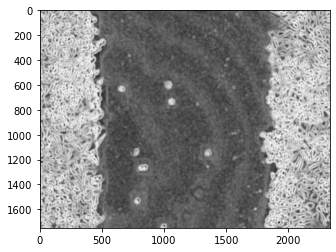

In [27]:
entr_img = entropy(img,disk(10))
plt.imshow(entr_img,plt.cm.gray)#in the scratched region entropy is low. entropy is high where there is high disorder

In [28]:
from skimage.filters import try_all_threshold

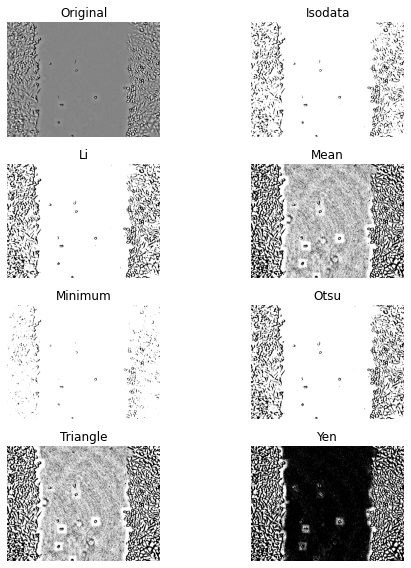

In [29]:
fig,ax=try_all_threshold(img,verbose=False,figsize=(8,8)) #without using entropy thresholding gives very poor results
plt.show()

In [30]:
from skimage.filters import threshold_otsu
thresh = threshold_otsu(entr_img)
thresh #Otsu gives us the best value which can be used to separate these two regions

2.260092536061305

In [31]:
#Now we want to binarize/segment this image
#Binary image is the image made up of 0 and 1 or False and True
binary = entr_img<=thresh
binary

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

2554351


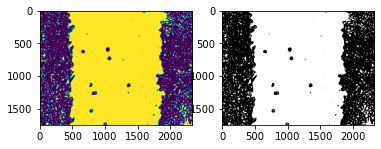

In [32]:
plt.subplot(1,2,1,)
plt.imshow(binary)

plt.subplot(1,2,2)
plt.imshow(binary,plt.cm.gray)

print(np.sum(binary==True)) #all the yellow pixels

# Automating for multiple images 

In [33]:
import glob


1 216403


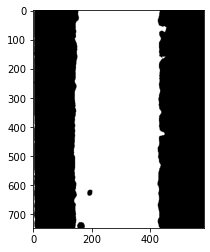

2 121870


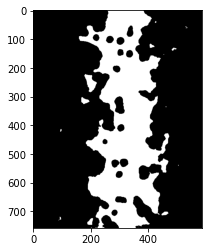

3 93330


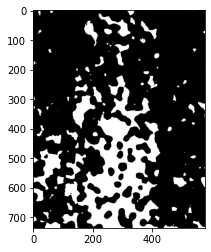

4 52518


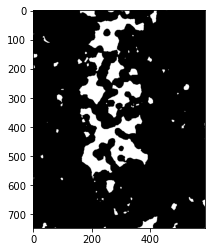

[1, 2, 3, 4] [216403, 121870, 93330, 52518]


In [43]:
time=1
time_list = []
area_list=[]
num=1
path = "../images2/scratch image/*.png" #agr kabhi code  output na de to it means, path is wrong

for file in glob.glob(path):
   
    img = io.imread(file,as_gray=True)
    entr_img = entropy(img,disk(10))
    thresh = threshold_otsu(entr_img)
    binary = entr_img<=thresh
    scratch_area = np.sum(binary==True)
    print(time,scratch_area)
    time_list.append(time)
    area_list.append(scratch_area)
    time+=1
    plt.imshow(binary,cmap=plt.cm.gray)
    plt.show()
print(time_list, area_list)
    

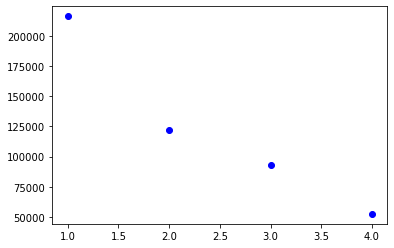

In [41]:
plt.plot(time_list,area_list,"bo")

In [44]:
#If we want to find slope , intrecept or r^2 value

from scipy.stats import linregress
print(linregress(time_list,area_list))

LinregressResult(slope=-52019.5, intercept=251079.0, rvalue=-0.9640550337296313, pvalue=0.03594496627036869, stderr=10137.834934047785, intercept_stderr=27763.60438820935)


In [48]:
slope,intercept,r_value,*_ = linregress(time_list,area_list)

In [54]:
print("Slope is: %d\nintercept is: %d\nR\N{SUPERSCRIPT TWO} value is : %d"%(slope,intercept,r_value**2))

Slope is: -52019
intercept is: 251079
R² value is : 0
